# 1. Problem Satement

Our World in Data has compiled [data](https://ourworldindata.org/covid-deaths-by-vaccination) on Covid-19 death rates (per 100,000 people) vs. vaccination status for the United States and 3 other countries.

The time periods and structure of the data vary, unfortunately.  Rather than work through the differences, I will focus on the US data.

Will compare death rates for people who choose not to get vaccinated versus those who chose to safeguard themselves.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 2. Load and analyze the structure of the data source.

In [2]:
US = pd.read_csv('united-states-rates-of-covid-19-deaths-by-vaccination-status.csv', parse_dates=[2], infer_datetime_format=True)

In [3]:
US.info()
US.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Entity                           210 non-null    object        
 1   Code                             0 non-null      float64       
 2   Day                              210 non-null    datetime64[ns]
 3   Fully vaccinated (all vaccines)  210 non-null    float64       
 4   Johnson&Johnson                  30 non-null     float64       
 5   Pfizer/BioNTech                  30 non-null     float64       
 6   Moderna                          30 non-null     float64       
 7   Unvaccinated                     210 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 13.2+ KB


,Code,Fully vaccinated (all vaccines),Johnson&Johnson,Pfizer/BioNTech,Moderna,Unvaccinated
count,0.0,210.000000,30.000000,30.000000,30.000000,210.000000
mean,NaN,1.036993,0.985930,0.677648,0.565048,9.177480
std,NaN,2.354783,0.708780,0.516418,0.437810,14.564347
min,NaN,0.000000,0.156456,0.120322,0.083905,0.000000
25%,NaN,0.009101,0.346025,0.239680,0.169903,0.349230
50%,NaN,0.148820,0.772603,0.544465,0.414851,2.481433
75%,NaN,0.852366,1.614005,1.094260,0.965400,9.818190
max,NaN,13.429926,2.635171,1.666755,1.357471,64.884383


In [4]:
print(US.Day.unique(), US.Entity.unique())
US.sort_values('Day').head(25)

['2021-04-10T00:00:00.000000000' '2021-04-17T00:00:00.000000000'
 '2021-04-24T00:00:00.000000000' '2021-05-01T00:00:00.000000000'
 '2021-05-08T00:00:00.000000000' '2021-05-15T00:00:00.000000000'
 '2021-05-22T00:00:00.000000000' '2021-05-29T00:00:00.000000000'
 '2021-06-05T00:00:00.000000000' '2021-06-12T00:00:00.000000000'
 '2021-06-19T00:00:00.000000000' '2021-06-26T00:00:00.000000000'
 '2021-07-03T00:00:00.000000000' '2021-07-10T00:00:00.000000000'
 '2021-07-17T00:00:00.000000000' '2021-07-24T00:00:00.000000000'
 '2021-07-31T00:00:00.000000000' '2021-08-07T00:00:00.000000000'
 '2021-08-14T00:00:00.000000000' '2021-08-21T00:00:00.000000000'
 '2021-08-28T00:00:00.000000000' '2021-09-04T00:00:00.000000000'
 '2021-09-11T00:00:00.000000000' '2021-09-18T00:00:00.000000000'
 '2021-09-25T00:00:00.000000000' '2021-10-02T00:00:00.000000000'
 '2021-10-09T00:00:00.000000000' '2021-10-16T00:00:00.000000000'
 '2021-10-23T00:00:00.000000000' '2021-10-30T00:00:00.000000000'] ['12-17' '18-29' '30-49'

,Entity,Code,Day,Fully vaccinated (all vaccines),Johnson&Johnson,Pfizer/BioNTech,Moderna,Unvaccinated
0,12-17,NaN,2021-04-10,0.000000,NaN,NaN,NaN,0.022621
180,All ages,NaN,2021-04-10,0.458969,1.023284,0.594950,0.229640,1.981090
30,18-29,NaN,2021-04-10,0.000000,NaN,NaN,NaN,0.085829
150,80+,NaN,2021-04-10,1.653049,NaN,NaN,NaN,25.569929
60,30-49,NaN,2021-04-10,0.054285,NaN,NaN,NaN,0.530268
90,50-64,NaN,2021-04-10,0.130217,NaN,NaN,NaN,3.005767
120,65-79,NaN,2021-04-10,0.485325,NaN,NaN,NaN,10.332746
1,12-17,NaN,2021-04-17,0.000000,NaN,NaN,NaN,0.046141
31,18-29,NaN,2021-04-17,0.000000,NaN,NaN,NaN,0.133660
151,80+,NaN,2021-04-17,2.147310,NaN,NaN,NaN,23.138890


In [5]:
US[US['Johnson&Johnson'].notnull()]

,Entity,Code,Day,Fully vaccinated (all vaccines),Johnson&Johnson,Pfizer/BioNTech,Moderna,Unvaccinated
180,All ages,NaN,2021-04-10,0.458969,1.023284,0.594950,0.229640,1.981090
181,All ages,NaN,2021-04-17,0.473927,0.817695,0.542962,0.344295,1.979659
182,All ages,NaN,2021-04-24,0.354046,0.773356,0.372890,0.244736,1.948972
183,All ages,NaN,2021-05-01,0.342635,0.686621,0.359824,0.241191,1.668298
184,All ages,NaN,2021-05-08,0.272175,0.508937,0.248982,0.246098,1.595146
185,All ages,NaN,2021-05-15,0.205723,0.281146,0.236580,0.153976,1.261166
186,All ages,NaN,2021-05-22,0.173770,0.407241,0.148115,0.162215,1.020768
187,All ages,NaN,2021-05-29,0.134406,0.231024,0.121983,0.132738,0.953516
188,All ages,NaN,2021-06-05,0.130892,0.291859,0.120322,0.114631,0.780716
189,All ages,NaN,2021-06-12,0.121640,0.156456,0.136647,0.096272,0.721508


In [6]:
US.drop(columns='Code', inplace=True)   ## Empty 

## 2.1 US Data Characterization

American data run weekly for 30 weeks from April 10 to October 30, 2010.  They are grouped in two ways.  
1. Death rates (per 100,000) are tabulated by Vaccine brand and unvaccinated for all ages combined.
2. Death rates (per 100,000) are tabulated by 6 age groups (12+) marked vaccinated or unvaccinated.

Partially vaccinated people are excluded from the data.

# 3. Data Analysis

This table conveys two sets of data.  
1. The 'All ages' Entity rows have data across the Vaccine brand columns to track death rates for each vaccine over time.
2. Death rates over time by age group are stored vertically, keyed by Entity (age group) with rates in the Vaccinated and Unvaccinated columns.

We will graph each and analyze what it tells us.

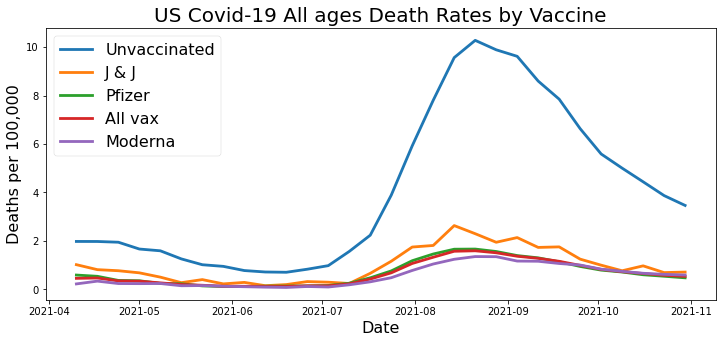

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
plt.style.use('seaborn-poster')

perVaccine = US[US.Entity=='All ages']
sns.lineplot(x="Day", y='Unvaccinated', data=perVaccine, ax=ax, label='Unvaccinated')
sns.lineplot(x="Day", y='Johnson&Johnson', data=perVaccine, ax=ax, label='J & J')
sns.lineplot(x="Day", y='Pfizer/BioNTech', data=perVaccine, ax=ax, label='Pfizer')
sns.lineplot(x="Day", y='Fully vaccinated (all vaccines)', data=perVaccine, ax=ax, label='All vax')
sns.lineplot(x="Day", y='Moderna', data=perVaccine, ax=ax, label='Moderna')

ax.set_ylabel('Deaths per 100,000', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('US Covid-19 All ages Death Rates by Vaccine', fontsize=20)
ax.legend()
plt.show()

## 3.1 Death Rates per Vaccine

The data does not break down deaths by vaccine and ages.  Also it excludes partially-vaccinated people, so these rates are for people who are not vaccinated at all or are fully-vaccinated (2 shots for Moderna and Pfizer or 1 Johnson & Johnson shot).

We can see that for all ages, the peak death rate reached in late August was 10 deaths per 100,000 for unvaccinated people.  

That amounts to 1/100th of a percent or 1 basis point of all unvaccinated Americans died in that week.  There were about 330 Million Americans in 2021.  Extrapolating numbers backward from this [Mayo Clinic tracker](https://www.mayoclinic.org/coronavirus-covid-19/vaccine-tracker) which started in November, we estimate 50% of Americans were fully vaccinated in late August and 60% at least partially vaccinated.  That tells us about 40% of Americans were unvaccinated, which is approximately 132 M.  So about 13,200 unvaccinated people died that peak week.

The cumulative number of dead last year would be the integral of each curve times the number of people with each status.

All the vaccines kept the death rate below 3 per 100,000.  The least effective was Johnson & Johnson, which peaked at about 2.5 in mid-August.  That is less than one quarter the death rate of the unvaccinated.  If those people had taken the J&J shot, presumably 9,900 of them would be alive today.


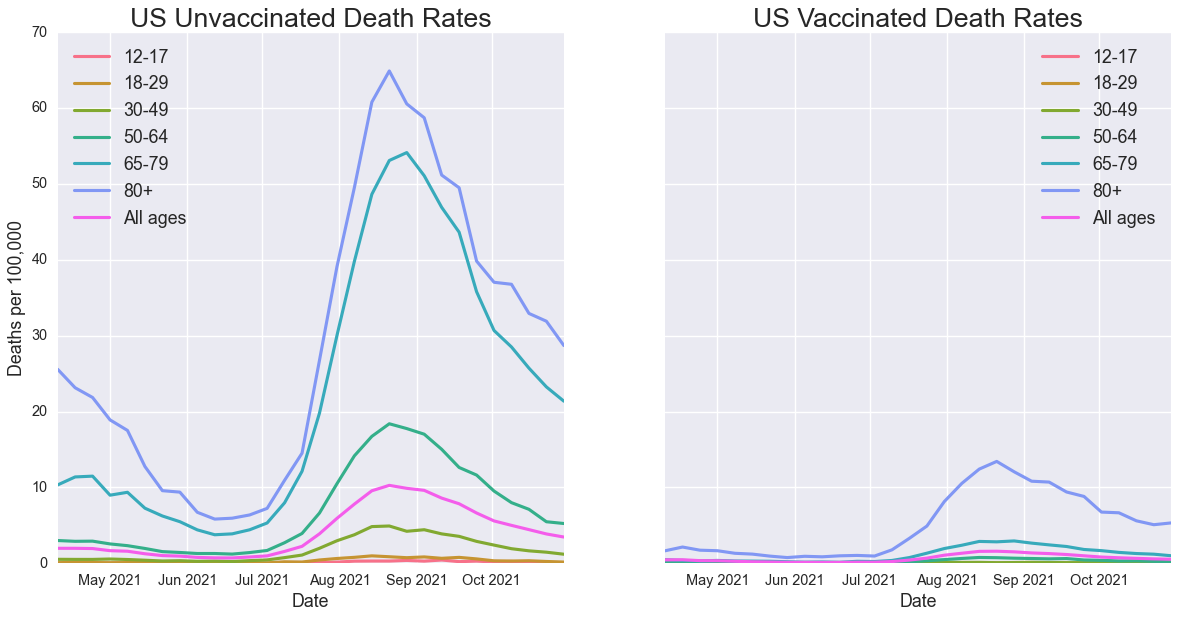

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(16,8), sharey=True)
plt.subplots_adjust(hspace=0.5)
plt.style.use('seaborn-poster')

sns.lineplot(x="Day", y='Unvaccinated', hue='Entity', data=US, ax=ax[0])

ax[0].set_ylabel('Deaths per 100,000', fontsize=16)
ax[0].set_xlabel('Date', fontsize=16)
ax[0].set_title('US Unvaccinated Death Rates', fontsize=24)
ax[0].legend(loc='best')

sns.lineplot(x="Day", y='Fully vaccinated (all vaccines)', hue='Entity', data=US, ax=ax[1])

ax[1].set_ylabel('Deaths per 100,000', fontsize=16)
ax[1].set_xlabel('Date', fontsize=16)
ax[1].set_title('US Vaccinated Death Rates', fontsize=24)
ax[1].legend(loc='best')

plt.show()

## 3.2 Death rates by Age Group and Vaccination status

A picture is worth a thousand words.  Death rates among the unvaccinated peaked in late August.  The vaccinated graph is basically empty except for a much smaller blip among people over age 80.

The death rate for the unvaccinated over age 80 peaked at about 65 / 100,000.  It never got as low as 5 during the reported time period, April through October, 2021.  For the vaccinated the peak was below 15.  The vaccines made octogenarians 4 or 5 times less likely to die at this peak.  

The unvaccinated death rate for younger senior citizens, 65-79, peaked at about 53.  Its min was about 4.  Vaccinated 65-79 year-olds faced a peak death rate of just 3.  This is approximately 17 times better than their unvaccinated neighbors.

# 4. Conclusion

These data are limited in time frame and cross-tabulation, but they prove out the effectiveness of the Covid-19 vaccines at preventing death.  The vaccines were created by several companies in the US and around the world in record time.  They are a remarkable achievement.

These data do not address the other important topics of illness, severe illness, hospitalization and need for ICU and breathing assistance measures.

To noone's surprise, vaccination works.  Americans over age 80 face the strongest threat of dying from Covid-19 and stood a 4 or 5 times better chance of surviving the pandemic during this time period if they were vaccinated.  Americans over age 65 are at a nearly as strong threat of dying, and vaccination boosted their chances of survival even more.

People at all age groups reduced their chances of dying by getting vaccinated.  The death rate does fall off sharply with youth and it is very small for Americans under age 30.
